<a href="https://colab.research.google.com/github/AditiSatsangi/Jodhpur-Map-and-OD-Matrix-for-Multiclass-Vehicles/blob/main/Distance_%26_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Code used to extract the table from excel sheet
"""
import pandas as pd
df = pd.read_excel("bus_matrix.xlsx")
bus_matrix = [df.iloc[3+1+11*j:12+11*j,1:].to_numpy() for j in range(10)]
"""

'\nimport pandas as pd\ndf = pd.read_excel("bus_matrix.xlsx")\nbus_matrix = [df.iloc[3+1+11*j:12+11*j,1:].to_numpy() for j in range(10)]\n'

#Flow Speed Function

\begin{equation}
v_f(r) = \left\{
\begin{array}{ll}
\frac{r}{r_c}V_{c}+ \left ( 1 - \frac{r}{r_{c}} \right)V^{u, max} & \text{if } r < r_c \\
\frac{r_{jam} - r_a}{r_{jam} - r_{c}}V_c r_c & \text{if } r \ge r_c
\end{array}
\right.
\end{equation}

In [ ]:
def flow(density, vehicle_class):
  """
  Calculates the  flow speed given the density and vehicle_class.
  Args:
    density: The density of vehicles in vehicles per kilometer.
    vehicle_class: The vehicle class

  Remarks:
    All critical and max values are specific to the vehicle class

  Returns:
    The vehicle flow speed in kilometers per hour.
  """

  if density < critical_density_class:
    return (density/critical_density_class)*critical_flow + (1-(density/critical_density_class))*max_flow_vehicle_class

  else:
    return ((jam_density - density)/(jam_density - criticial_density_class)) * critical_flow * critical_density_class



# Traversal distance Computation

In [ ]:
import numpy as np
def compute_travel_time(density, flow, vehicle_class):
    # Define the parameters specific to the vehicle class
    if vehicle_class == 'motorcycle':
        beta_0 = 0.01  # Coefficient for the traversable distance equation
        beta_1 = 0.02  # Coefficient for the traversable distance equation
        D_l =  0.001   # Look ahead distance for the driver
    elif vehicle_class == 'car':
        beta_0 = 0.12  # Coefficient for the traversable distance equation
        beta_1 = 0.15  # Coefficient for the traversable distance equation
        D_l = 0.001  # Look ahead distance for the driver
    elif vehicle_class == 'bus':  # car truck motorcycle bus
        beta_0 = 0.03  # Coefficient for the traversable distance equation
        beta_1 = 0.01  # Coefficient for the traversable distance equation
        D_l = 0.002    # Look ahead distance for the driver
    elif vehicle_class == 'truck':  # car truck motorcycle bus
        beta_0 = 0.03  # Coefficient for the traversable distance equation
        beta_1 = 0.01  # Coefficient for the traversable distance equation
        D_l = 0.002   # Look ahead distance for the driver(cell length)
    else:
        raise ValueError("Invalid vehicle class")

    # Compute the traversable distance based on density and flow
    traversable_distance = beta_0 * density + beta_1 * flow

    # Compute the travel time using the traversable distance and other parameters
    travel_time = D_l / (flow * (1 - density) + traversable_distance)
    return traversable_distance, travel_time

density=np.zeros((8, 8))
flow = np.array     ([[0,	8,	0,	0,	0,	17,	14,	0],
                      [9,	0,	9,	0,	0,	14,	16,	11],
                      [0,	10,	0,	0,	0,	0,	0,	12],
                      [0,	0, 0,	0,	0,	11,	0,	12],
                      [0,	0,	0,	0,	0,	12,	15,	0],
                      [14,	0,	0,	15,	17,	0,	14,	0],
                      [17,	13,	0,	0,	12,	10,	0,	0],
                      [0,	17,	14,	10,	0,	0,	0, 0]])

# Example flow matrix
travel_time= np.zeros((8,8))
vehicle_class = 'car'
travel_time = compute_travel_time(density, flow, vehicle_class)
#print("Travel time:")
#print(travel_time)

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


## BUS

In [ ]:
t1 = np.array([[0, 12, 0, 0, 0, 19, 17, 0],
       [11, 0, 9, 0, 0, 17, 13, 11],
       [0, 10, 0, 0, 0, 0, 0, 12],
       [0, 0, 0, 0, 0, 15, 0, 12],
       [0, 0, 0, 0, 0, 12, 17, 0],
       [14, 0, 0, 15, 17, 0, 16, 0],
       [16, 13, 0, 0, 14, 13, 0, 0],
       [0, 19, 14, 11, 0, 0, 0, 0]])

t2 = np.array([[0, 17, 0, 0, 0, 12, 14, 0],
       [10, 0, 11, 0, 0, 11, 15, 18],
       [0, 14, 0, 0, 0, 0, 0, 15],
       [0, 0, 0, 0, 0, 13, 0, 14],
       [0, 0, 0, 0, 0, 11, 13, 0],
       [15, 0, 0, 13, 17, 0, 14, 0],
       [18, 13, 0, 0, 19, 11, 0, 0],
       [0, 12, 13, 10, 0, 0, 0, 0]])

t3 = np.array([[0, 8, 0, 0, 0, 11, 17, 0],
       [7, 0, 18, 0, 0, 12, 17, 19],
       [0, 11, 0, 0, 0, 0, 0, 17],
       [0, 0, 0, 0, 0, 14, 0, 15],
       [0, 0, 0, 0, 0, 12, 14, 0],
       [9, 0, 0, 13, 11, 0, 12, 0],
       [12, 14, 0, 0, 12, 12, 0, 0],
       [0, 20, 10, 10, 0, 0, 0, 0]])

t4 = np.array([[0, 15, 0, 0, 0, 13, 14, 0],
       [10, 0, 14, 0, 0, 10, 11, 10],
       [0, 16, 0, 0, 0, 0, 0, 16],
       [0, 0, 0, 0, 0, 14, 0, 16],
       [0, 0, 0, 0, 0, 12, 13, 0],
       [11, 0, 0, 12, 20, 0, 12, 0],
       [12, 15, 0, 0, 21, 12, 0, 0],
       [0, 15, 7, 11, 0, 0, 0, 0]])

t5 = np.array([[0, 17, 0, 0, 0, 17, 13, 0],
       [15, 0, 14, 0, 0, 16, 14, 13],
       [0, 5, 0, 0, 0, 0, 0, 15],
       [0, 0, 0, 0, 0, 14, 0, 20],
       [0, 0, 0, 0, 0, 14, 18, 0],
       [8, 0, 0, 13, 15, 0, 16, 0],
       [10, 14, 0, 0, 20, 12, 0, 0],
       [0, 19, 10, 16, 0, 0, 0, 0]])

t6 = np.array([[0, 21, 0, 0, 0, 13, 14, 0],
       [12, 0, 17, 0, 0, 16, 16, 14],
       [0, 19, 0, 0, 0, 0, 0, 17],
       [0, 0, 0, 0, 0, 12, 0, 15],
       [0, 0, 0, 0, 0, 11, 12, 0],
       [8, 0, 0, 15, 13, 0, 10, 0],
       [23, 14, 0, 0, 17, 10, 0, 0],
       [0, 12, 16, 19, 0, 0, 0, 0]])

t7 = np.array([[0, 15, 0, 0, 0, 14, 13, 0],
       [22, 0, 12, 0, 0, 15, 18, 15],
       [0, 14, 0, 0, 0, 0, 0, 10],
       [0, 0, 0, 0, 0, 9, 0, 8],
       [0, 0, 0, 0, 0, 10, 14, 0],
       [17, 0, 0, 15, 14, 0, 19, 0],
       [19, 18, 0, 0, 18, 13, 0, 0],
       [0, 20, 9, 15, 0, 0, 0, 0]])

t8 = np.array([[0, 10, 0, 0, 0, 15, 15, 0],
       [12, 0, 11, 0, 0, 9, 19, 18],
       [0, 14, 0, 0, 0, 0, 0, 10],
       [0, 0, 0, 0, 0, 17, 0, 20],
       [0, 0, 0, 0, 0, 14, 16, 0],
       [17, 0, 0, 13, 19, 0, 17, 0],
       [16, 17, 0, 0, 1, 12, 0, 0],
       [0, 12, 10, 10, 0, 0, 0, 0]])

t9 = np.array([[0, 10, 0, 0, 0, 15, 13, 0],
       [14, 0, 14, 0, 0, 10, 17, 10],
       [0, 11, 0, 0, 0, 0, 0, 11],
       [0, 0, 0, 0, 0, 13, 0, 15],
       [0, 0, 0, 0, 0, 11, 15, 0],
       [12, 0, 0, 18, 18, 0, 20, 0],
       [19, 15, 0, 0, 15, 17, 0, 0],
       [0, 20, 16, 14, 0, 0, 0, 0]])

t10 = np.array([[0, 10, 0, 0, 0, 20, 9, 0],
       [17, 0, 12, 0, 0, 10, 10, 11],
       [0, 14, 0, 0, 0, 0, 0, 15],
       [0, 0, 0, 0, 0, 13, 0, 9],
       [0, 0, 0, 0, 0, 11, 20, 0],
       [12, 0, 0, 10, 14, 0, 14, 0],
       [16, 13, 0, 0, 13, 12, 0, 0],
       [0, 12, 10, 14, 0, 0, 0, 0]])

In [ ]:
bus = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10])
bus;

In [ ]:
bus.shape

(10, 8, 8)

In [ ]:
bus[0].shape

(8, 8)

In [ ]:
bus_traversable_distance = [compute_travel_time(density, bus[i], "bus")[0] for i in range(10)]
bus_traversable_distance

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


[array([[0.  , 0.12, 0.  , 0.  , 0.  , 0.19, 0.17, 0.  ],
        [0.11, 0.  , 0.09, 0.  , 0.  , 0.17, 0.13, 0.11],
        [0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.12],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.17, 0.  ],
        [0.14, 0.  , 0.  , 0.15, 0.17, 0.  , 0.16, 0.  ],
        [0.16, 0.13, 0.  , 0.  , 0.14, 0.13, 0.  , 0.  ],
        [0.  , 0.19, 0.14, 0.11, 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 0.17, 0.  , 0.  , 0.  , 0.12, 0.14, 0.  ],
        [0.1 , 0.  , 0.11, 0.  , 0.  , 0.11, 0.15, 0.18],
        [0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.15],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.14],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.13, 0.  ],
        [0.15, 0.  , 0.  , 0.13, 0.17, 0.  , 0.14, 0.  ],
        [0.18, 0.13, 0.  , 0.  , 0.19, 0.11, 0.  , 0.  ],
        [0.  , 0.12, 0.13, 0.1 , 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 0.08, 0.  , 0.  , 0.  , 0.11, 0.17, 0.  ],
        [0

In [ ]:
bus_time_travel = [compute_travel_time(density, bus[i], "bus")[1] for i in range(10)]
bus_time_travel;

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


## TRUCK

In [ ]:
truck = [np.array([[0, 12, 0, 0, 0, 19, 17, 0],
        [11, 0, 9, 0, 0, 17, 13, 11],
        [0, 10, 0, 0, 0, 0, 0, 12],
        [0, 0, 0, 0, 0, 15, 0, 12],
        [0, 0, 0, 0, 0, 12, 17, 0],
        [14, 0, 0, 15, 17, 0, 16, 0],
        [16, 13, 0, 0, 14, 13, 0, 0],
        [0, 19, 14, 11, 0, 0, 0, 0]]),

        np.array([[0, 17, 0, 0, 0, 12, 14, 0],
        [10, 0, 11, 0, 0, 11, 15, 18],
        [0, 14, 0, 0, 0, 0, 0, 15],
        [0, 0, 0, 0, 0, 13, 0, 14],
        [0, 0, 0, 0, 0, 11, 13, 0],
        [15, 0, 0, 13, 17, 0, 14, 0],
        [18, 13, 0, 0, 19, 11, 0, 0],
        [0, 12, 13, 10, 0, 0, 0, 0]]),

        np.array([[0, 8, 0, 0, 0, 11, 17, 0],
        [7, 0, 18, 0, 0, 12, 17, 19],
        [0, 11, 0, 0, 0, 0, 0, 17],
        [0, 0, 0, 0, 0, 14, 0, 15],
        [0, 0, 0, 0, 0, 12, 14, 0],
        [9, 0, 0, 13, 11, 0, 12, 0],
        [12, 14, 0, 0, 12, 12, 0, 0],
        [0, 20, 10, 10, 0, 0, 0, 0]]),

        np.array([[0, 15, 0, 0, 0, 13, 14, 0],
        [10, 0, 14, 0, 0, 10, 11, 10],
        [0, 16, 0, 0, 0, 0, 0, 16],
        [0, 0, 0, 0, 0, 14, 0, 16],
        [0, 0, 0, 0, 0, 12, 13, 0],
        [11, 0, 0, 12, 20, 0, 12, 0],
        [12, 15, 0, 0, 21, 12, 0, 0],
        [0, 15, 7, 11, 0, 0, 0, 0]]),

        np.array([[0, 17, 0, 0, 0, 17, 13, 0],
        [15, 0, 14, 0, 0, 16, 14, 13],
        [0, 5, 0, 0, 0, 0, 0, 15],
        [0, 0, 0, 0, 0, 14, 0, 20],
        [0, 0, 0, 0, 0, 14, 18, 0],
        [8, 0, 0, 13, 15, 0, 16, 0],
        [10, 14, 0, 0, 20, 12, 0, 0],
        [0, 19, 10, 16, 0, 0, 0, 0]]),

        np.array([[0, 21, 0, 0, 0, 13, 14, 0],
        [12, 0, 17, 0, 0, 16, 16, 14],
        [0, 19, 0, 0, 0, 0, 0, 17],
        [0, 0, 0, 0, 0, 12, 0, 15],
        [0, 0, 0, 0, 0, 11, 12, 0],
        [8, 0, 0, 15, 13, 0, 10, 0],
        [23, 14, 0, 0, 17, 10, 0, 0],
        [0, 12, 16, 19, 0, 0, 0, 0]]),

        np.array([[0, 15, 0, 0, 0, 14, 13, 0],
        [22, 0, 12, 0, 0, 15, 18, 15],
        [0, 14, 0, 0, 0, 0, 0, 10],
        [0, 0, 0, 0, 0, 9, 0, 8],
        [0, 0, 0, 0, 0, 10, 14, 0],
        [17, 0, 0, 15, 14, 0, 19, 0],
        [19, 18, 0, 0, 18, 13, 0, 0],
        [0, 20, 9, 15, 0, 0, 0, 0]]),

        np.array([[0, 10, 0, 0, 0, 15, 15, 0],
        [12, 0, 11, 0, 0, 9, 19, 18],
        [0, 14, 0, 0, 0, 0, 0, 10],
        [0, 0, 0, 0, 0, 17, 0, 20],
        [0, 0, 0, 0, 0, 14, 16, 0],
        [17, 0, 0, 13, 19, 0, 17, 0],
        [16, 17, 0, 0, 1, 12, 0, 0],
        [0, 12, 10, 10, 0, 0, 0, 0]]),

        np.array([[0, 10, 0, 0, 0, 15, 13, 0],
        [14, 0, 14, 0, 0, 10, 17, 10],
        [0, 11, 0, 0, 0, 0, 0, 11],
        [0, 0, 0, 0, 0, 13, 0, 15],
        [0, 0, 0, 0, 0, 11, 15, 0],
        [12, 0, 0, 18, 18, 0, 20, 0],
        [19, 15, 0, 0, 15, 17, 0, 0],
        [0, 20, 16, 14, 0, 0, 0, 0]]),

         np.array([[0, 10, 0, 0, 0, 20, 9, 0],
        [17, 0, 12, 0, 0, 10, 10, 11],
        [0, 14, 0, 0, 0, 0, 0, 15],
        [0, 0, 0, 0, 0, 13, 0, 9],
        [0, 0, 0, 0, 0, 11, 20, 0],
        [12, 0, 0, 10, 14, 0, 14, 0],
        [16, 13, 0, 0, 13, 12, 0, 0],
        [0, 12, 10, 14, 0, 0, 0, 0]])]

In [ ]:
print(truck[0].reshape((8,8,1)))

[[[ 0]
  [12]
  [ 0]
  [ 0]
  [ 0]
  [19]
  [17]
  [ 0]]

 [[11]
  [ 0]
  [ 9]
  [ 0]
  [ 0]
  [17]
  [13]
  [11]]

 [[ 0]
  [10]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [12]]

 [[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [15]
  [ 0]
  [12]]

 [[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [12]
  [17]
  [ 0]]

 [[14]
  [ 0]
  [ 0]
  [15]
  [17]
  [ 0]
  [16]
  [ 0]]

 [[16]
  [13]
  [ 0]
  [ 0]
  [14]
  [13]
  [ 0]
  [ 0]]

 [[ 0]
  [19]
  [14]
  [11]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]]


In [ ]:
truck = np.array(truck)
truck;

In [ ]:
truck_traversable_distance = [compute_travel_time(density, truck[i], "truck")[0] for i in range(10)]
truck_traversable_distance

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


[array([[0.  , 0.12, 0.  , 0.  , 0.  , 0.19, 0.17, 0.  ],
        [0.11, 0.  , 0.09, 0.  , 0.  , 0.17, 0.13, 0.11],
        [0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.12],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.17, 0.  ],
        [0.14, 0.  , 0.  , 0.15, 0.17, 0.  , 0.16, 0.  ],
        [0.16, 0.13, 0.  , 0.  , 0.14, 0.13, 0.  , 0.  ],
        [0.  , 0.19, 0.14, 0.11, 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 0.17, 0.  , 0.  , 0.  , 0.12, 0.14, 0.  ],
        [0.1 , 0.  , 0.11, 0.  , 0.  , 0.11, 0.15, 0.18],
        [0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.15],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.14],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.13, 0.  ],
        [0.15, 0.  , 0.  , 0.13, 0.17, 0.  , 0.14, 0.  ],
        [0.18, 0.13, 0.  , 0.  , 0.19, 0.11, 0.  , 0.  ],
        [0.  , 0.12, 0.13, 0.1 , 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 0.08, 0.  , 0.  , 0.  , 0.11, 0.17, 0.  ],
        [0

In [ ]:
truck_time_travel = [compute_travel_time(density, truck[i], "truck")[1] for i in range(10)]
truck_time_travel = np.nan_to_num(truck_time_travel , nan=0.0, posinf=0.0, neginf=0.0)
truck_time_travel;

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


## Motorcycle

In [ ]:
motorcycle = np.array([np.array([[0, 11, 0, 0, 0, 12, 11, 0],
        [7, 0, 8, 0, 0, 21, 17, 19],
        [0, 10, 0, 0, 0, 0, 0, 9],
        [0, 0, 0, 0, 0, 6, 0, 11],
        [0, 0, 0, 0, 0, 7, 12, 0],
        [8, 0, 0, 11, 7, 0, 6, 0],
        [6, 5, 0, 0, 8, 9, 0, 0],
        [0, 7, 8, 6, 0, 0, 0, 0]]),

np.array([[0, 14, 0, 0, 0, 7, 8, 0],
        [4, 0, 4, 0, 0, 8, 2, 3],
        [0, 7, 0, 0, 0, 0, 0, 15],
        [0, 0, 0, 0, 0, 17, 0, 12],
        [0, 0, 0, 0, 0, 14, 19, 0],
        [20, 0, 0, 12, 4, 0, 6, 0],
        [9, 14, 0, 0, 16, 19, 0, 0],
        [0, 18, 13, 15, 0, 0, 0, 0]]),

np.array([[0, 11, 0, 0, 0, 14, 8, 0],
        [6, 0, 10, 0, 0, 13, 20, 19],
        [0, 5, 0, 0, 0, 0, 0, 10],
        [0, 0, 0, 0, 0, 8, 0, 9],
        [0, 0, 0, 0, 0, 1, 2, 0],
        [10, 11, 13, 14, 9, 0, 4, 0],
        [13, 5, 0, 0, 8, 6, 0, 0],
        [0, 12, 14, 6, 0, 0, 0, 0]]),

np.array([[0, 20, 0, 0, 0, 14, 11, 0],
        [17, 0, 6, 0, 0, 16, 10, 1],
        [0, 3, 0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 15, 0, 10],
        [0, 0, 0, 0, 0, 12, 6, 0],
        [13, 14, 12, 16, 6, 0, 8, 0],
        [12, 7, 0, 0, 9, 15, 0, 0],
        [0, 7, 8, 9, 0, 0, 0, 0]]),

 np.array([[0, 15, 0, 0, 0, 12, 7, 0],
        [13, 0, 6, 0, 0, 12, 8, 9],
        [0, 11, 0, 0, 0, 0, 0, 14],
        [0, 0, 0, 0, 0, 15, 0, 15],
        [0, 0, 0, 0, 0, 19, 16, 0],
        [17, 12, 15, 14, 10, 0, 18, 0],
        [4, 6, 0, 0, 6, 14, 0, 0],
        [0, 8, 13, 8, 0, 0, 0, 0]]),

np.array([[0, 3, 0, 0, 0, 12, 19, 0],
        [16, 0, 2, 0, 0, 10, 13, 16],
        [0, 8, 0, 0, 0, 5, 6, 15],
        [0, 0, 0, 0, 0, 9, 0, 11],
        [0, 0, 0, 0, 0, 14, 13, 0],
        [13, 7, 12, 9, 13, 0, 15, 0],
        [14, 13, 0, 0, 15, 17, 0, 0],
        [0, 20, 18, 9, 0, 0, 0, 0]]),

np.array([[0, 14, 0, 0, 0, 7, 9, 0],
        [2, 0, 5, 0, 0, 12, 20, 17],
        [0, 16, 0, 0, 0, 7, 0, 9],
        [0, 0, 0, 0, 0, 14, 17, 18],
        [0, 0, 0, 0, 0, 14, 20, 0],
        [12, 13, 15, 12, 12, 0, 10, 0],
        [8, 9, 0, 0, 10, 11, 0, 0],
        [0, 6, 11, 16, 0, 0, 0, 0]]),

 np.array([[0, 13, 0, 0, 0, 9, 8, 0],
        [14, 0, 12, 0, 0, 15, 15, 17],
        [0, 16, 0, 0, 0, 9, 0, 7],
        [0, 0, 0, 0, 0, 8, 16, 18],
        [0, 0, 0, 0, 0, 16, 17, 0],
        [10, 10, 10, 16, 17, 0, 12, 0],
        [13, 14, 0, 0, 16, 16, 0, 0],
        [0, 12, 12, 12, 0, 0, 0, 0]]),

 np.array([[0, 17, 0, 0, 0, 18, 16, 0],
        [16, 0, 13, 0, 0, 16, 14, 15],
        [0, 20, 0, 0, 0, 16, 0, 9],
        [0, 0, 0, 0, 0, 6, 8, 7],
        [0, 0, 0, 0, 0, 12, 12, 0],
        [10, 13, 14, 8, 6, 0, 14, 0],
        [12, 10, 0, 0, 8, 9, 0, 0],
        [0, 19, 17, 11, 0, 0, 0, 0]]),
np.array([[0, 13, 0, 0, 0, 19, 9, 0],
        [6, 0, 9, 0, 0, 11, 16, 12],
        [0, 6, 0, 0, 0, 10, 0, 13],
        [0, 0, 0, 0, 0, 14, 15, 13],
        [0, 0, 0, 0, 0, 15, 13, 0],
        [9, 7, 12, 16, 7, 0, 17, 0],
        [13, 14, 0, 0, 19, 16, 0, 0],
        [0, 6, 10, 13, 0, 0, 0, 0]])
 ])

In [ ]:
motorcycle;

In [ ]:
motorcycle_traversable_distance = [compute_travel_time(density, motorcycle[i], "motorcycle")[0] for i in range(10)]
motorcycle_traversable_distance

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


[array([[0.  , 0.22, 0.  , 0.  , 0.  , 0.24, 0.22, 0.  ],
        [0.14, 0.  , 0.16, 0.  , 0.  , 0.42, 0.34, 0.38],
        [0.  , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.18],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.22],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.24, 0.  ],
        [0.16, 0.  , 0.  , 0.22, 0.14, 0.  , 0.12, 0.  ],
        [0.12, 0.1 , 0.  , 0.  , 0.16, 0.18, 0.  , 0.  ],
        [0.  , 0.14, 0.16, 0.12, 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 0.28, 0.  , 0.  , 0.  , 0.14, 0.16, 0.  ],
        [0.08, 0.  , 0.08, 0.  , 0.  , 0.16, 0.04, 0.06],
        [0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.3 ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.34, 0.  , 0.24],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.38, 0.  ],
        [0.4 , 0.  , 0.  , 0.24, 0.08, 0.  , 0.12, 0.  ],
        [0.18, 0.28, 0.  , 0.  , 0.32, 0.38, 0.  , 0.  ],
        [0.  , 0.36, 0.26, 0.3 , 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 0.22, 0.  , 0.  , 0.  , 0.28, 0.16, 0.  ],
        [0

In [ ]:
motorcycle_time_travel = [compute_travel_time(density, motorcycle[i], "motorcycle")[1] for i in range(10)]
motorcycle_time_travel = np.nan_to_num(motorcycle_time_travel  , nan=0.0, posinf=0.0, neginf=0.0)
motorcycle_time_travel;

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


## CAR

In [ ]:
car = np.array([
np.array([[0, 8, 0, 0, 0, 17, 14, 0],
        [9, 0, 9, 0, 0, 14, 16, 11],
        [0, 10, 0, 0, 0, 0, 0, 12],
        [0, 0, 0, 0, 0, 11, 0, 12],
        [0, 0, 0, 0, 0, 12, 15, 0],
        [14, 0, 0, 15, 17, 0, 14, 0],
        [17, 13, 0, 0, 12, 10, 0, 0],
        [0, 17, 14, 10, 0, 0, 0, 0]]),

np.array([[0, 17, 0, 0, 0, 12, 14, 0],
        [10, 0, 11, 0, 0, 11, 15, 16],
        [0, 14, 0, 0, 0, 0, 0, 14],
        [0, 0, 0, 0, 0, 13, 0, 14],
        [0, 0, 0, 0, 0, 14, 13, 0],
        [15, 0, 0, 14, 18, 0, 10, 0],
        [18, 13, 0, 0, 20, 11, 0, 0],
        [0, 16, 12, 11, 0, 0, 0, 0]]),

np.array([[0, 8, 0, 0, 0, 11, 18, 0],
        [6, 0, 18, 0, 0, 12, 17, 20],
        [0, 10, 0, 0, 0, 0, 0, 17],
        [0, 0, 0, 0, 0, 15, 0, 15],
        [0, 0, 0, 0, 0, 12, 14, 0],
        [9, 0, 0, 13, 11, 0, 12, 0],
        [14, 13, 0, 0, 12, 12, 0, 0],
        [0, 19, 9, 11, 0, 0, 0, 0]]),

np.array([[0, 15, 0, 0, 0, 12, 14, 0],
        [14, 0, 14, 0, 0, 10, 11, 10],
        [0, 14, 0, 0, 0, 0, 0, 16],
        [0, 0, 0, 0, 0, 14, 0, 16],
        [0, 0, 0, 0, 0, 12, 13, 0],
        [11, 0, 0, 12, 20, 0, 5, 0],
        [12, 15, 0, 0, 20, 12, 0, 0],
        [0, 15, 7, 11, 0, 0, 0, 0]]),

np.array([[0, 16, 0, 0, 0, 17, 13, 0],
        [14, 0, 12, 0, 0, 16, 14, 13],
        [0, 5, 0, 0, 0, 0, 0, 15],
        [0, 0, 0, 0, 0, 14, 0, 20],
        [0, 0, 0, 0, 0, 14, 18, 0],
        [8, 0, 0, 13, 12, 0, 15, 0],
        [11, 14, 0, 0, 20, 12, 0, 0],
        [0, 20, 10, 16, 0, 0, 0, 0]]),

np.array([[0, 20, 0, 0, 0, 14, 14, 0],
        [14, 0, 18, 0, 0, 16, 16, 14],
        [0, 19, 0, 0, 0, 0, 0, 17],
        [0, 0, 0, 0, 0, 12, 0, 15],
        [0, 0, 0, 0, 0, 11, 12, 0],
        [8, 0, 0, 16, 12, 0, 10, 0],
        [23, 14, 0, 0, 17, 10, 0, 0],
        [0, 12, 18, 19, 0, 0, 0, 0]]),

np.array([[0, 15, 0, 0, 0, 14, 12, 0],
        [15, 0, 12, 0, 0, 15, 18, 15],
        [0, 16, 0, 0, 0, 0, 0, 11],
        [0, 0, 0, 0, 0, 9, 0, 8],
        [0, 0, 0, 0, 0, 10, 11, 0],
        [17, 0, 0, 16, 14, 0, 19, 0],
        [19, 18, 0, 0, 18, 13, 0, 0],
        [0, 20, 9, 14, 0, 0, 0, 0]]),

np.array([[0, 10, 0, 0, 0, 15, 15, 0],
        [12, 0, 10, 0, 0, 9, 19, 16],
        [0, 12, 0, 0, 0, 0, 0, 10],
        [0, 0, 0, 0, 0, 17, 0, 20],
        [0, 0, 0, 0, 0, 14, 16, 0],
        [17, 0, 0, 13, 18, 0, 16, 0],
        [16, 17, 0, 0, 1, 11, 0, 0],
        [0, 12, 10, 10, 0, 0, 0, 0]]),

np.array([[0, 10, 0, 0, 0, 15, 13, 0],
        [12, 0, 15, 0, 0, 10, 17, 10],
        [0, 11, 0, 0, 0, 0, 0, 11],
        [0, 0, 0, 0, 0, 13, 0, 15],
        [0, 0, 0, 0, 0, 11, 15, 0],
        [12, 0, 0, 17, 18, 0, 20, 0],
        [20, 16, 0, 0, 15, 17, 0, 0],
        [0, 20, 16, 14, 0, 0, 0, 0]]),

 np.array([[0, 10, 0, 0, 0, 20, 9, 0],
        [16, 0, 12, 0, 0, 10, 10, 11],
        [0, 14, 0, 0, 0, 0, 0, 11],
        [0, 0, 0, 0, 0, 13, 0, 9],
        [0, 0, 0, 0, 0, 11, 20, 0],
        [12, 0, 0, 10, 14, 0, 16, 0],
        [16, 20, 0, 0, 13, 10, 0, 0],
        [0, 12, 10, 16, 0, 0, 0, 0]]),
])

In [ ]:
car_traversable_distance = [compute_travel_time(density, car[i], "car")[0] for i in range(10)]
car_traversable_distance

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


[array([[0.  , 1.2 , 0.  , 0.  , 0.  , 2.55, 2.1 , 0.  ],
        [1.35, 0.  , 1.35, 0.  , 0.  , 2.1 , 2.4 , 1.65],
        [0.  , 1.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 1.8 ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 1.65, 0.  , 1.8 ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 1.8 , 2.25, 0.  ],
        [2.1 , 0.  , 0.  , 2.25, 2.55, 0.  , 2.1 , 0.  ],
        [2.55, 1.95, 0.  , 0.  , 1.8 , 1.5 , 0.  , 0.  ],
        [0.  , 2.55, 2.1 , 1.5 , 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 2.55, 0.  , 0.  , 0.  , 1.8 , 2.1 , 0.  ],
        [1.5 , 0.  , 1.65, 0.  , 0.  , 1.65, 2.25, 2.4 ],
        [0.  , 2.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 2.1 ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 1.95, 0.  , 2.1 ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 2.1 , 1.95, 0.  ],
        [2.25, 0.  , 0.  , 2.1 , 2.7 , 0.  , 1.5 , 0.  ],
        [2.7 , 1.95, 0.  , 0.  , 3.  , 1.65, 0.  , 0.  ],
        [0.  , 2.4 , 1.8 , 1.65, 0.  , 0.  , 0.  , 0.  ]]),
 array([[0.  , 1.2 , 0.  , 0.  , 0.  , 1.65, 2.7 , 0.  ],
        [0

In [ ]:
car_travel_time = [compute_travel_time(density, car[i], "car")[1] for i in range(10)]
car_travel_time = np.nan_to_num(car_travel_time  , nan=0.0, posinf=0.0, neginf=0.0)
car_travel_time;

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


# Flow Speed

In [ ]:
import numpy as np
#motorcycle': 1, 'car': 2, 'bus': 3, 'truck': 4}
# Given data
Dl = np.array([1,1,2,2])
#motorcycle 50 km/hr, car- 60 km/hr, bus 25km/hr, truck 40 km/hr
Vuf = np.array([50,60,25,40])
Dutr = np.array([motorcycle_traversable_distance, car_traversable_distance, bus_traversable_distance, truck_traversable_distance ])

def compute_flow_speed(vehicle_class_i, Vuf, Dutr, Dl):
    D = Dl[vehicle_class_i]
    V = Vuf[vehicle_class_i]
    Dutr= Dutr[vehicle_class_i]
    Vu = (V * Dutr) / D
    return Vu

V_motorcycle = compute_flow_speed(0, Vuf, Dutr, Dl)
V_car = compute_flow_speed(1, Vuf, Dutr, Dl)
V_bus = compute_flow_speed(2, Vuf, Dutr, Dl)
V_truck = compute_flow_speed(3, Vuf, Dutr, Dl)

"""for vehicle_class_i in range(len(Dl)):
  vehicle_class= ['motorcycle','car', 'bus', 'truck'][vehicle_class_i]
  Vu = compute_flow_speed(vehicle_class_i, Vuf, Dutr, Dl)
  print(f"Flow Speed for {vehicle_class}:")
  print(Vu)"""

'for vehicle_class_i in range(len(Dl)):\n  vehicle_class= [\'motorcycle\',\'car\', \'bus\', \'truck\'][vehicle_class_i]\n  Vu = compute_flow_speed(vehicle_class_i, Vuf, Dutr, Dl)\n  print(f"Flow Speed for {vehicle_class}:")\n  print(Vu)'

## Car

In [ ]:
V_car

array([[[  0.,  72.,   0.,   0.,   0., 153., 126.,   0.],
        [ 81.,   0.,  81.,   0.,   0., 126., 144.,  99.],
        [  0.,  90.,   0.,   0.,   0.,   0.,   0., 108.],
        [  0.,   0.,   0.,   0.,   0.,  99.,   0., 108.],
        [  0.,   0.,   0.,   0.,   0., 108., 135.,   0.],
        [126.,   0.,   0., 135., 153.,   0., 126.,   0.],
        [153., 117.,   0.,   0., 108.,  90.,   0.,   0.],
        [  0., 153., 126.,  90.,   0.,   0.,   0.,   0.]],

       [[  0., 153.,   0.,   0.,   0., 108., 126.,   0.],
        [ 90.,   0.,  99.,   0.,   0.,  99., 135., 144.],
        [  0., 126.,   0.,   0.,   0.,   0.,   0., 126.],
        [  0.,   0.,   0.,   0.,   0., 117.,   0., 126.],
        [  0.,   0.,   0.,   0.,   0., 126., 117.,   0.],
        [135.,   0.,   0., 126., 162.,   0.,  90.,   0.],
        [162., 117.,   0.,   0., 180.,  99.,   0.,   0.],
        [  0., 144., 108.,  99.,   0.,   0.,   0.,   0.]],

       [[  0.,  72.,   0.,   0.,   0.,  99., 162.,   0.],
        [ 

##Bus

In [ ]:
V_bus

array([[[0.   , 1.5  , 0.   , 0.   , 0.   , 2.375, 2.125, 0.   ],
        [1.375, 0.   , 1.125, 0.   , 0.   , 2.125, 1.625, 1.375],
        [0.   , 1.25 , 0.   , 0.   , 0.   , 0.   , 0.   , 1.5  ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 1.875, 0.   , 1.5  ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 1.5  , 2.125, 0.   ],
        [1.75 , 0.   , 0.   , 1.875, 2.125, 0.   , 2.   , 0.   ],
        [2.   , 1.625, 0.   , 0.   , 1.75 , 1.625, 0.   , 0.   ],
        [0.   , 2.375, 1.75 , 1.375, 0.   , 0.   , 0.   , 0.   ]],

       [[0.   , 2.125, 0.   , 0.   , 0.   , 1.5  , 1.75 , 0.   ],
        [1.25 , 0.   , 1.375, 0.   , 0.   , 1.375, 1.875, 2.25 ],
        [0.   , 1.75 , 0.   , 0.   , 0.   , 0.   , 0.   , 1.875],
        [0.   , 0.   , 0.   , 0.   , 0.   , 1.625, 0.   , 1.75 ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 1.375, 1.625, 0.   ],
        [1.875, 0.   , 0.   , 1.625, 2.125, 0.   , 1.75 , 0.   ],
        [2.25 , 1.625, 0.   , 0.   , 2.375, 1.375, 0.   , 0.   ],
        

## Motorcycle

In [ ]:
V_motorcycle

array([[[ 0., 11.,  0.,  0.,  0., 12., 11.,  0.],
        [ 7.,  0.,  8.,  0.,  0., 21., 17., 19.],
        [ 0., 10.,  0.,  0.,  0.,  0.,  0.,  9.],
        [ 0.,  0.,  0.,  0.,  0.,  6.,  0., 11.],
        [ 0.,  0.,  0.,  0.,  0.,  7., 12.,  0.],
        [ 8.,  0.,  0., 11.,  7.,  0.,  6.,  0.],
        [ 6.,  5.,  0.,  0.,  8.,  9.,  0.,  0.],
        [ 0.,  7.,  8.,  6.,  0.,  0.,  0.,  0.]],

       [[ 0., 14.,  0.,  0.,  0.,  7.,  8.,  0.],
        [ 4.,  0.,  4.,  0.,  0.,  8.,  2.,  3.],
        [ 0.,  7.,  0.,  0.,  0.,  0.,  0., 15.],
        [ 0.,  0.,  0.,  0.,  0., 17.,  0., 12.],
        [ 0.,  0.,  0.,  0.,  0., 14., 19.,  0.],
        [20.,  0.,  0., 12.,  4.,  0.,  6.,  0.],
        [ 9., 14.,  0.,  0., 16., 19.,  0.,  0.],
        [ 0., 18., 13., 15.,  0.,  0.,  0.,  0.]],

       [[ 0., 11.,  0.,  0.,  0., 14.,  8.,  0.],
        [ 6.,  0., 10.,  0.,  0., 13., 20., 19.],
        [ 0.,  5.,  0.,  0.,  0.,  0.,  0., 10.],
        [ 0.,  0.,  0.,  0.,  0.,  8.,  0.,  9

##Truck

In [ ]:
V_truck

array([[[0. , 2.4, 0. , 0. , 0. , 3.8, 3.4, 0. ],
        [2.2, 0. , 1.8, 0. , 0. , 3.4, 2.6, 2.2],
        [0. , 2. , 0. , 0. , 0. , 0. , 0. , 2.4],
        [0. , 0. , 0. , 0. , 0. , 3. , 0. , 2.4],
        [0. , 0. , 0. , 0. , 0. , 2.4, 3.4, 0. ],
        [2.8, 0. , 0. , 3. , 3.4, 0. , 3.2, 0. ],
        [3.2, 2.6, 0. , 0. , 2.8, 2.6, 0. , 0. ],
        [0. , 3.8, 2.8, 2.2, 0. , 0. , 0. , 0. ]],

       [[0. , 3.4, 0. , 0. , 0. , 2.4, 2.8, 0. ],
        [2. , 0. , 2.2, 0. , 0. , 2.2, 3. , 3.6],
        [0. , 2.8, 0. , 0. , 0. , 0. , 0. , 3. ],
        [0. , 0. , 0. , 0. , 0. , 2.6, 0. , 2.8],
        [0. , 0. , 0. , 0. , 0. , 2.2, 2.6, 0. ],
        [3. , 0. , 0. , 2.6, 3.4, 0. , 2.8, 0. ],
        [3.6, 2.6, 0. , 0. , 3.8, 2.2, 0. , 0. ],
        [0. , 2.4, 2.6, 2. , 0. , 0. , 0. , 0. ]],

       [[0. , 1.6, 0. , 0. , 0. , 2.2, 3.4, 0. ],
        [1.4, 0. , 3.6, 0. , 0. , 2.4, 3.4, 3.8],
        [0. , 2.2, 0. , 0. , 0. , 0. , 0. , 3.4],
        [0. , 0. , 0. , 0. , 0. , 2.8, 0. , 3.

# Density

## Motorcycle

In [ ]:
V_motorcycle; #Speed
#k_motorcycle = np.array(motorcycle_res_k).reshape(10,8,8); # Density
#q_motorcycle = np.array(motorcycle_res_q).reshape(10,8,8); # Flow
#for i in range(10):
k_motorcycle = motorcycle/V_motorcycle
k_motorcycle= np.nan_to_num(k_motorcycle, nan=0.0, posinf=0.0, neginf=0.0)
k_motorcycle

<ipython-input-94-00e898cb9cdf>:5: RuntimeWarning: invalid value encountered in true_divide
  k_motorcycle = motorcycle/V_motorcycle


array([[[0., 1., 0., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 1.],
        [0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 1., 0.],
        [1., 1., 0., 0., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 1.],
        [0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 1., 0.],
        [1., 1., 0., 0., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 1.],
        [0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0., 1., 0.],
        [1., 1., 0., 0., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0., 0

## Car

In [ ]:
V_car; #Speed
#k_car = np.array(car_res_k).reshape(10,8,8); # Density
#q_car = np.array(car_res_q).reshape(10,8,8); # Flow
k_car= car/V_car
k_car= np.nan_to_num(k_car, nan=0.0, posinf=0.0, neginf=0.0)
k_car

<ipython-input-95-30e344e9499f>:4: RuntimeWarning: invalid value encountered in true_divide
  k_car= car/V_car


array([[[0.        , 0.11111111, 0.        , 0.        , 0.        ,
         0.11111111, 0.11111111, 0.        ],
        [0.11111111, 0.        , 0.11111111, 0.        , 0.        ,
         0.11111111, 0.11111111, 0.11111111],
        [0.        , 0.11111111, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.11111111],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.11111111, 0.        , 0.11111111],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.11111111, 0.11111111, 0.        ],
        [0.11111111, 0.        , 0.        , 0.11111111, 0.11111111,
         0.        , 0.11111111, 0.        ],
        [0.11111111, 0.11111111, 0.        , 0.        , 0.11111111,
         0.11111111, 0.        , 0.        ],
        [0.        , 0.11111111, 0.11111111, 0.11111111, 0.        ,
         0.        , 0.        , 0.        ]],

       [[0.        , 0.11111111, 0.        , 0.        , 0.        ,
         

## Truck

In [ ]:
V_truck; #Speed
#k_truck = np.array(truck_res_k).reshape(10,8,8); # Density
#q_truck = np.array(truck_res_q).reshape(10,8,8); # Flow
k_truck= truck/V_truck
k_truck= np.nan_to_num(k_truck, nan=0.0, posinf=0.0, neginf=0.0)
k_truck

<ipython-input-96-67df7c87cbdc>:4: RuntimeWarning: invalid value encountered in true_divide
  k_truck= truck/V_truck


array([[[0., 5., 0., 0., 0., 5., 5., 0.],
        [5., 0., 5., 0., 0., 5., 5., 5.],
        [0., 5., 0., 0., 0., 0., 0., 5.],
        [0., 0., 0., 0., 0., 5., 0., 5.],
        [0., 0., 0., 0., 0., 5., 5., 0.],
        [5., 0., 0., 5., 5., 0., 5., 0.],
        [5., 5., 0., 0., 5., 5., 0., 0.],
        [0., 5., 5., 5., 0., 0., 0., 0.]],

       [[0., 5., 0., 0., 0., 5., 5., 0.],
        [5., 0., 5., 0., 0., 5., 5., 5.],
        [0., 5., 0., 0., 0., 0., 0., 5.],
        [0., 0., 0., 0., 0., 5., 0., 5.],
        [0., 0., 0., 0., 0., 5., 5., 0.],
        [5., 0., 0., 5., 5., 0., 5., 0.],
        [5., 5., 0., 0., 5., 5., 0., 0.],
        [0., 5., 5., 5., 0., 0., 0., 0.]],

       [[0., 5., 0., 0., 0., 5., 5., 0.],
        [5., 0., 5., 0., 0., 5., 5., 5.],
        [0., 5., 0., 0., 0., 0., 0., 5.],
        [0., 0., 0., 0., 0., 5., 0., 5.],
        [0., 0., 0., 0., 0., 5., 5., 0.],
        [5., 0., 0., 5., 5., 0., 5., 0.],
        [5., 5., 0., 0., 5., 5., 0., 0.],
        [0., 5., 5., 5., 0., 0

## Bus

In [ ]:
#q_bus/V_bus
k_bus= bus/V_bus
k_bus= np.nan_to_num(k_bus, nan=0.0, posinf=0.0, neginf=0.0)
k_bus

<ipython-input-97-76d624bc61a4>:2: RuntimeWarning: invalid value encountered in true_divide
  k_bus= bus/V_bus


array([[[0., 8., 0., 0., 0., 8., 8., 0.],
        [8., 0., 8., 0., 0., 8., 8., 8.],
        [0., 8., 0., 0., 0., 0., 0., 8.],
        [0., 0., 0., 0., 0., 8., 0., 8.],
        [0., 0., 0., 0., 0., 8., 8., 0.],
        [8., 0., 0., 8., 8., 0., 8., 0.],
        [8., 8., 0., 0., 8., 8., 0., 0.],
        [0., 8., 8., 8., 0., 0., 0., 0.]],

       [[0., 8., 0., 0., 0., 8., 8., 0.],
        [8., 0., 8., 0., 0., 8., 8., 8.],
        [0., 8., 0., 0., 0., 0., 0., 8.],
        [0., 0., 0., 0., 0., 8., 0., 8.],
        [0., 0., 0., 0., 0., 8., 8., 0.],
        [8., 0., 0., 8., 8., 0., 8., 0.],
        [8., 8., 0., 0., 8., 8., 0., 0.],
        [0., 8., 8., 8., 0., 0., 0., 0.]],

       [[0., 8., 0., 0., 0., 8., 8., 0.],
        [8., 0., 8., 0., 0., 8., 8., 8.],
        [0., 8., 0., 0., 0., 0., 0., 8.],
        [0., 0., 0., 0., 0., 8., 0., 8.],
        [0., 0., 0., 0., 0., 8., 8., 0.],
        [8., 0., 0., 8., 8., 0., 8., 0.],
        [8., 8., 0., 0., 8., 8., 0., 0.],
        [0., 8., 8., 8., 0., 0

# Time Travel

## $Bus$

In [ ]:
bus_time_travel = [compute_travel_time(k_bus[i], bus[i], "bus")[1] for i in range(10)]
bus_time_travel = np.nan_to_num(bus_time_travel , nan=0.0, posinf=0.0, neginf=0.0)
bus_time_travel

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


array([[[ 0.00000000e+00, -2.39120038e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.50863695e-05,
         -1.68648284e-05,  0.00000000e+00],
        [-2.60926288e-05,  0.00000000e+00, -3.19131961e-05,
          0.00000000e+00,  0.00000000e+00, -1.68648284e-05,
         -2.20677480e-05, -2.60926288e-05],
        [ 0.00000000e+00, -2.87108814e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -2.39120038e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.91186311e-05,
          0.00000000e+00, -2.39120038e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -2.39120038e-05,
         -1.68648284e-05,  0.00000000e+00],
        [-2.04876050e-05,  0.00000000e+00,  0.00000000e+00,
         -1.91186311e-05, -1.68648284e-05,  0.00000000e+00,
         -1.79211470e-05,  0.00000000e+00],
        [-1.7921

In [ ]:
bus_time_travel.shape

(10, 8, 8)

## $Car$

In [ ]:
car_time_travel = [compute_travel_time(k_car[i], car[i], "car")[1] for i in range(10)]
car_time_travel = np.nan_to_num(car_time_travel , nan=0.0, posinf=0.0, neginf=0.0)
car_time_travel

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


array([[[0.00000000e+00, 1.20128137e-04, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 5.65788647e-05, 6.86918028e-05, 0.00000000e+00],
        [1.06799573e-04, 0.00000000e+00, 1.06799573e-04, 0.00000000e+00,
         0.00000000e+00, 6.86918028e-05, 6.01122095e-05, 8.74040983e-05],
        [0.00000000e+00, 9.61333048e-05, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.01282051e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 8.74040983e-05, 0.00000000e+00, 8.01282051e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 8.01282051e-05, 6.41162642e-05, 0.00000000e+00],
        [6.86918028e-05, 0.00000000e+00, 0.00000000e+00, 6.41162642e-05,
         5.65788647e-05, 0.00000000e+00, 6.86918028e-05, 0.00000000e+00],
        [5.65788647e-05, 7.39705761e-05, 0.00000000e+00, 0.00000000e+00,
         8.01282051e-05, 9.61333048e-05, 0.00

## $Motorcycle$

In [ ]:
motorcycle_time_travel = [compute_travel_time(k_motorcycle[i], motorcycle[i], "motorcycle")[1] for i in range(10)]
motorcycle_time_travel = np.nan_to_num(motorcycle_time_travel , nan=0.0, posinf=0.0, neginf=0.0)

motorcycle_time_travel


<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


array([[[0.        , 0.00434783, 0.        , 0.        , 0.        ,
         0.004     , 0.00434783, 0.        ],
        [0.00666667, 0.        , 0.00588235, 0.        , 0.        ,
         0.00232558, 0.00285714, 0.0025641 ],
        [0.        , 0.0047619 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00526316],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00769231, 0.        , 0.00434783],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00666667, 0.004     , 0.        ],
        [0.00588235, 0.        , 0.        , 0.00434783, 0.00666667,
         0.        , 0.00769231, 0.        ],
        [0.00769231, 0.00909091, 0.        , 0.        , 0.00588235,
         0.00526316, 0.        , 0.        ],
        [0.        , 0.00666667, 0.00588235, 0.00769231, 0.        ,
         0.        , 0.        , 0.        ]],

       [[0.        , 0.00344828, 0.        , 0.        , 0.        ,
         

## $Truck$

In [ ]:
truck_time_travel = [compute_travel_time(k_truck[i], bus[i], "bus")[1] for i in range(10)]
truck_time_travel = np.nan_to_num(truck_time_travel , nan=0.0, posinf=0.0, neginf=0.0)
truck_time_travel

<ipython-input-70-c492ad516f4e>:27: RuntimeWarning: divide by zero encountered in true_divide
  travel_time = D_l / (flow * (1 - density) + traversable_distance)


array([[[ 0.00000000e+00, -4.19023675e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -2.64340471e-05,
         -2.95508274e-05,  0.00000000e+00],
        [-4.57247371e-05,  0.00000000e+00, -5.59284116e-05,
          0.00000000e+00,  0.00000000e+00, -2.95508274e-05,
         -3.86697602e-05, -4.57247371e-05],
        [ 0.00000000e+00, -5.03144654e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -4.19023675e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -3.35008375e-05,
          0.00000000e+00, -4.19023675e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -4.19023675e-05,
         -2.95508274e-05,  0.00000000e+00],
        [-3.59001975e-05,  0.00000000e+00,  0.00000000e+00,
         -3.35008375e-05, -2.95508274e-05,  0.00000000e+00,
         -3.14021039e-05,  0.00000000e+00],
        [-3.1402

In [ ]:
np.array(motorcycle_traversable_distance).shape

(10, 8, 8)

In [ ]:
V_bus.shape

(10, 8, 8)

In [ ]:
V_motorcycle.shape

(10, 8, 8)

# Shortest path

In [ ]:
import heapq

def dijkstra(graph, source):
    distances = {vertex: float("inf") for vertex in graph}
    distances[source] = 0
    visited = set()
    pq = []
    heapq.heappush(pq, (0, source))
    while pq:
        _, current = heapq.heappop(pq)
        if current in visited:
            continue
        visited.add(current)
        for neighbor, weight in graph[current].items():
            if distances[neighbor] > distances[current] + weight:
                distances[neighbor] = distances[current] + weight
                heapq.heappush(pq, (distances[neighbor], neighbor))
    return distances

def main():
    graph = {
        0: {1: 1, 2: 3},
        1: {2: 2},
        2: {0: 4}
    }
    print(dijkstra(graph, 0))


In [ ]:
main()

{0: 0, 1: 1, 2: 3}


# Graphs

In [ ]:
k_motorcycle[9]

array([[0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 1., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.]])

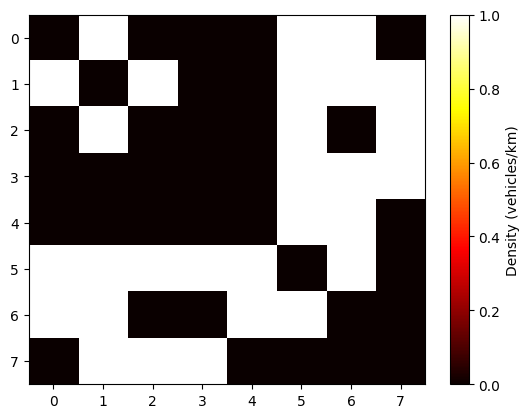

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(k_motorcycle[9], cmap = "hot", aspect = "auto")
plt.colorbar(label='Density (vehicles/km)')
plt.show()

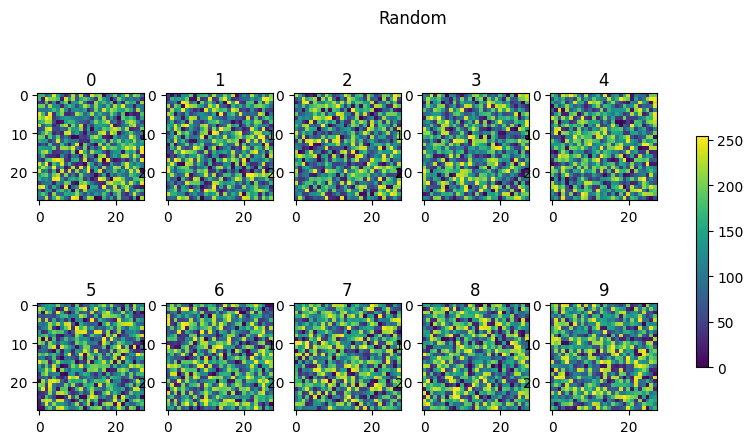

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, title, cmap='viridis'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i in range(10):
        im = axes[i // 5, i % 5].imshow(images[i], cmap=cmap)
        axes[i // 5, i % 5].set_title(str(i))

    # Add a color bar to show the scale of the colormap
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)

    fig.suptitle(title)
    plt.show()

images = np.random.randint(0, 255, (10, 28, 28))
show_images(images, "Random", cmap='viridis')


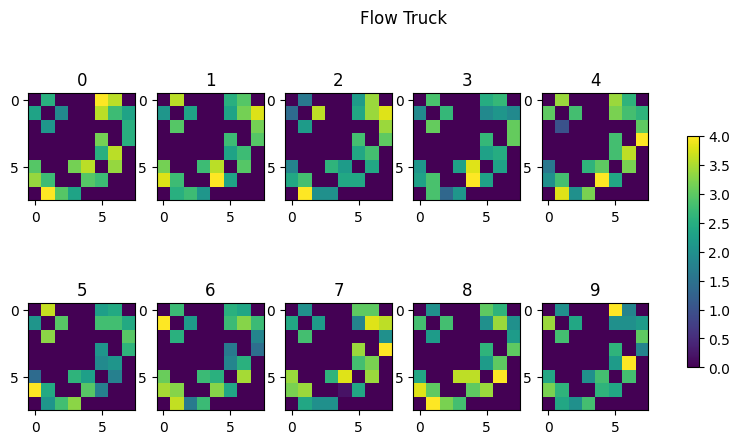

In [ ]:
show_images(V_truck, "Flow Truck")

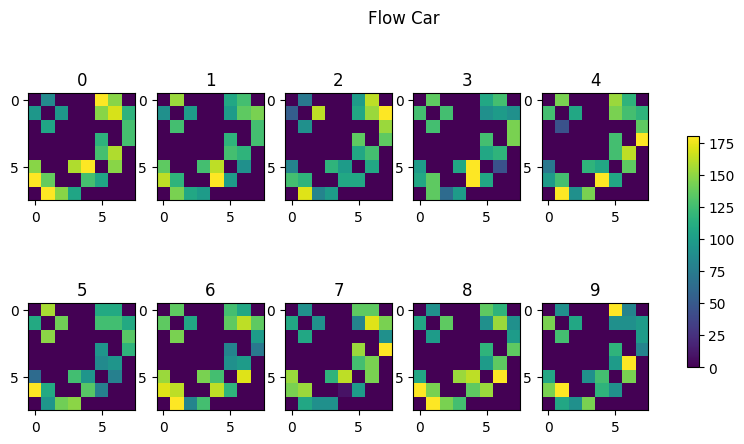

In [ ]:
show_images(V_car, "Flow Car")

In [ ]:
V_bus[1]

array([[0.   , 2.125, 0.   , 0.   , 0.   , 1.5  , 1.75 , 0.   ],
       [1.25 , 0.   , 1.375, 0.   , 0.   , 1.375, 1.875, 2.25 ],
       [0.   , 1.75 , 0.   , 0.   , 0.   , 0.   , 0.   , 1.875],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.625, 0.   , 1.75 ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.375, 1.625, 0.   ],
       [1.875, 0.   , 0.   , 1.625, 2.125, 0.   , 1.75 , 0.   ],
       [2.25 , 1.625, 0.   , 0.   , 2.375, 1.375, 0.   , 0.   ],
       [0.   , 1.5  , 1.625, 1.25 , 0.   , 0.   , 0.   , 0.   ]])

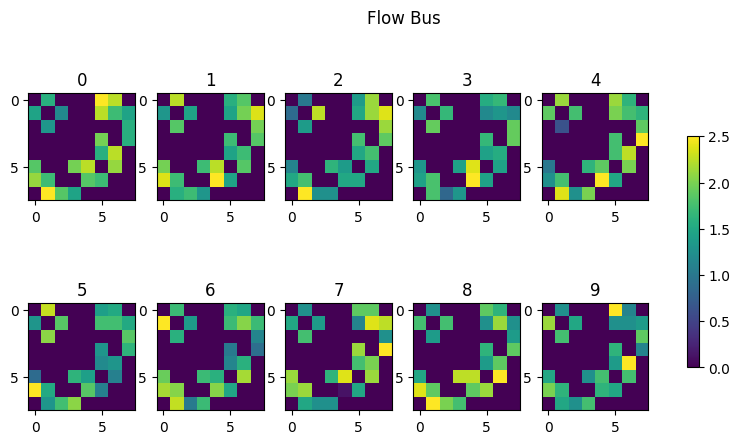

In [ ]:
show_images(V_bus, "Flow Bus")

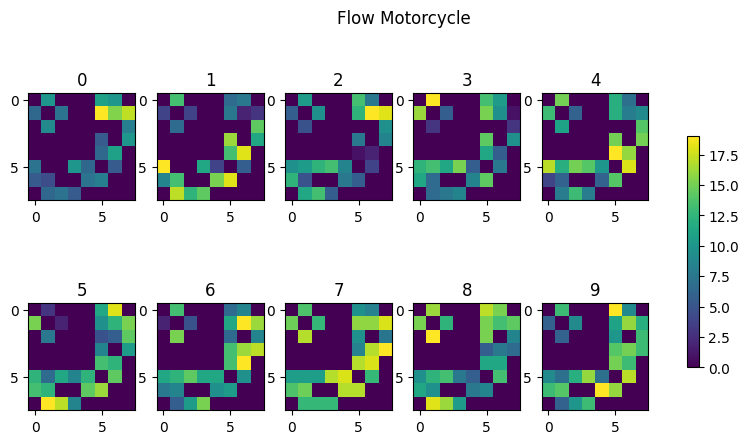

In [ ]:
show_images(V_motorcycle, "Flow Motorcycle")

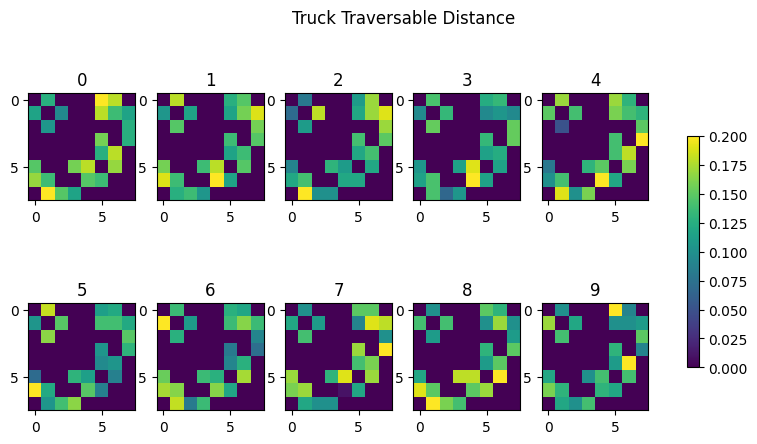

In [ ]:
show_images(truck_traversable_distance, "Truck Traversable Distance")

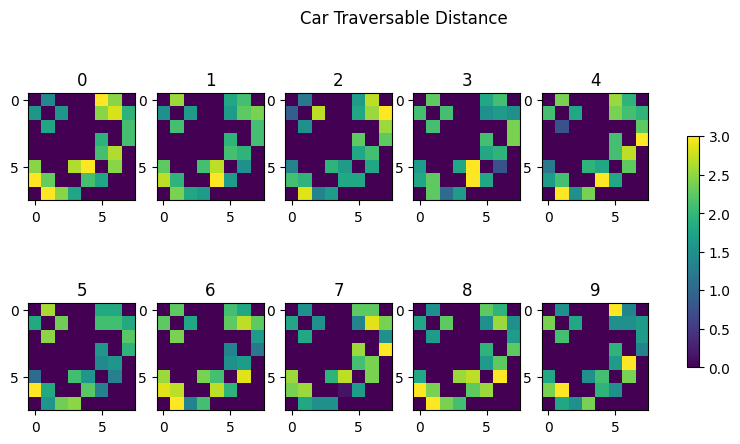

In [ ]:
show_images(car_traversable_distance, "Car Traversable Distance")

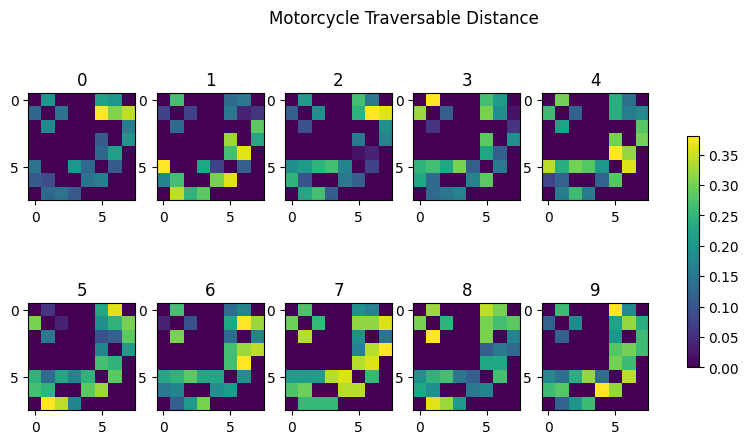

In [ ]:
show_images(motorcycle_traversable_distance, "Motorcycle Traversable Distance")



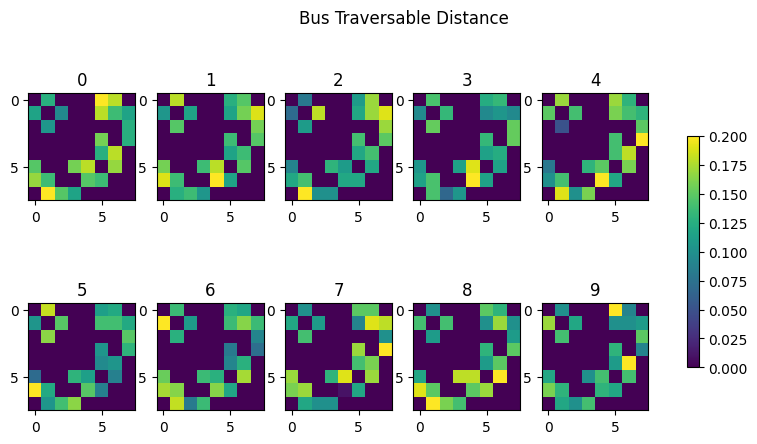

In [ ]:
show_images(bus_traversable_distance, "Bus Traversable Distance")

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


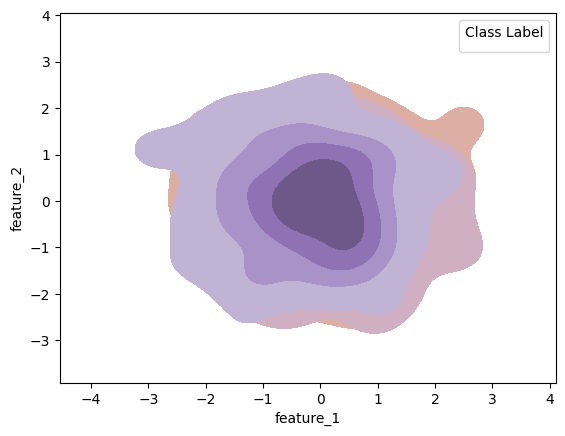

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample multiclass data (replace this with your actual dataset)
# Assume the data is a 2D array where each row represents a sample and the last column represents the class label
data = np.random.randn(500, 2)
class_labels = np.random.randint(0, 3, 500)

# Convert the data to a Pandas DataFrame
import pandas as pd
df = pd.DataFrame(data, columns=['feature_1', 'feature_2'])
df['class_label'] = class_labels

# Create the density plot
sns.kdeplot(data=df, x='feature_1', y='feature_2', hue='class_label', fill=True, cmap='viridis', levels=5)

# Add a legend
plt.legend(title='Class Label', loc='upper right')

# Show the plot
plt.show()


In [ ]:
def find_shortest_paths(graph, start_point):
    # initialize graphs to track if a point is visited,
    # current calculated distance from start to point,
    # and previous point taken to get to current point
    visited = [[False for col in row] for row in graph]
    distance = [[float('inf') for col in row] for row in graph]
    distance[start_point[0]][start_point[1]] = 0
    prev_point = [[None for col in row] for row in graph]
    n, m = len(graph), len(graph[0])
    number_of_points, visited_count = n * m, 0
    directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]
    min_heap = []

    # min_heap item format:
    # (pt's dist from start on this path, pt's row, pt's col)
    heapq.heappush(min_heap, (distance[start_point[0]][start_point[1]], start_point[0], start_point[1]))

    while visited_count < number_of_points:
        current_point = heapq.heappop(min_heap)
        distance_from_start, row, col = current_point
        for direction in directions:
            new_row, new_col = row + direction[0], col + direction[1]
            if -1 < new_row < n and -1 < new_col < m and not visited[new_row][new_col]:
                dist_to_new_point = distance_from_start + graph[new_row][new_col]
                if dist_to_new_point < distance[new_row][new_col]:
                    distance[new_row][new_col] = dist_to_new_point
                    prev_point[new_row][new_col] = (row, col)
                    heapq.heappush(min_heap, (dist_to_new_point, new_row, new_col))
        visited[row][col] = True
        visited_count += 1

    return distance, prev_point

In [ ]:
graph = [
    [1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
    [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
    [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
    [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
    [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
    [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
    [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
    [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
    [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
    [2, 3, 1, 1, 9, 4, 4, 5, 8, 1],
]

In [ ]:
distance, prev_point = find_shortest_paths(graph, (0, 0))

In [ ]:
distance

[[0, 1, 7, 10, 17, 22, 23, 30, 34, 36],
 [1, 4, 12, 11, 14, 21, 23, 29, 32, 34],
 [3, 4, 7, 13, 18, 19, 20, 23, 25, 33],
 [6, 10, 16, 17, 26, 22, 21, 26, 31, 38],
 [13, 14, 20, 20, 24, 23, 28, 27, 28, 29],
 [14, 17, 18, 27, 25, 25, 33, 28, 31, 36],
 [15, 18, 23, 32, 34, 26, 28, 32, 33, 34],
 [18, 19, 21, 26, 30, 28, 29, 35, 36, 43],
 [19, 21, 30, 29, 30, 31, 37, 40, 38, 39],
 [21, 24, 25, 26, 35, 35, 39, 44, 46, 40]]

In [ ]:
print(prev_point)

[[None, (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], [(0, 0), (0, 1), (1, 1), (0, 3), (1, 3), (1, 4), (2, 6), (1, 6), (2, 8), (1, 8)], [(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8)], [(2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (2, 5), (2, 6), (3, 6), (2, 8), (4, 9)], [(3, 0), (3, 1), (4, 1), (3, 3), (4, 3), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8)], [(4, 0), (4, 1), (5, 1), (5, 2), (4, 4), (4, 5), (5, 5), (4, 7), (4, 8), (4, 9)], [(5, 0), (6, 0), (5, 2), (6, 2), (5, 4), (5, 5), (6, 5), (5, 7), (5, 8), (6, 8)], [(6, 0), (6, 1), (7, 1), (7, 2), (7, 3), (6, 5), (6, 6), (7, 6), (6, 8), (6, 9)], [(7, 0), (7, 1), (7, 2), (7, 3), (8, 3), (7, 5), (7, 6), (7, 7), (7, 8), (8, 8)], [(8, 0), (8, 1), (9, 1), (9, 2), (9, 3), (8, 5), (9, 5), (9, 6), (8, 8), (8, 9)]]


In [ ]:
od_matrix = np.array([[0.0, 0.7873205159876687, 0.922666259977932, 1.2679910292122152, 0.6626354487834144, 0.973592367107364, 0.41510197095048307, 0.9335222094960481],
                          [0.7873205159876687, 0.0, 0.5843166886812995, 0.5063732864052762, 0.7636246914674278, 0.4720322695197309, 0.8230001825128103, 0.41043804400440403],
                          [0.922666259977932, 0.5843166886812995, 0.0, 0.6549476256468965, 1.2413704270710904, 1.0562847468234913, 1.1802915951321742, 0.2121417138933306],
                          [1.2679910292122152, 0.5063732864052762, 0.6549476256468965, 0.0, 1.1869642557305945, 1.1572393792516216, 1.170000416476491, 0.4784710672460683],
                          [0.6626354487834144, 0.7636246914674278, 1.2413704270710904, 1.1869642557305945, 0.0, 0.6889484891197067, 0.27855153292863814, 0.980644444428607],
                          [0.973592367107364, 0.4720322695197309, 1.0562847468234913, 1.1572393792516216, 0.6889484891197067, 0.0, 0.6060649351563587, 0.7993151802198004],
                          [0.41510197095048307, 0.8230001825128103, 1.1802915951321742, 1.170000416476491, 0.27855153292863814, 0.6060649351563587, 0.0, 0.999638693560208],
                          [0.9335222094960481, 0.41043804400440403, 0.2121417138933306, 0.4784710672460683, 0.980644444428607, 0.7993151802198004, 0.999638693560208, 0.0]])


In [ ]:
od_matrix[1]

array([0.78732052, 0.        , 0.58431669, 0.50637329, 0.76362469,
       0.47203227, 0.82300018, 0.41043804])

In [ ]:
import numpy as np

def make_adjacency_list(matrix):
    """
    Creates an adjacency list from a matrix.

    Args:
        matrix: The matrix.

    Returns:
        The adjacency list.
    """

    adjacency_list = []
    for i in range(len(matrix)):
        adjacency_list.append([])
        for j in range(len(matrix[0])):
            if matrix[i][j] > 0:
                adjacency_list[i].append(j)
    return adjacency_list

matrix = np.array([[0, 1, 3], [0, 2, 2], [1, 0, 1], [1, 2, 4], [2, 0, 5], [2, 1, 2]])
adjacency_list = make_adjacency_list(matrix)

In [ ]:
adjacency_list

[[1, 2], [1, 2], [0, 2], [0, 1, 2], [0, 2], [0, 1, 2]]

In [ ]:
make_adjacency_list(od_matrix)

[[1, 2, 3, 4, 5, 6, 7],
 [0, 2, 3, 4, 5, 6, 7],
 [0, 1, 3, 4, 5, 6, 7],
 [0, 1, 2, 4, 5, 6, 7],
 [0, 1, 2, 3, 5, 6, 7],
 [0, 1, 2, 3, 4, 6, 7],
 [0, 1, 2, 3, 4, 5, 7],
 [0, 1, 2, 3, 4, 5, 6]]

In [ ]:
import networkx as nx
def make_adjacency_list(matrix):
    """
    Creates an adjacency list from a distance matrix.

    Args:
        matrix: The distance matrix.

    Returns:
        The adjacency list.
    """
    adjacency_list = {}
    for i in range(len(matrix)):
        adjacency_list[i] = []
        for j in range(len(matrix[0])):
            if matrix[i][j] > 0:
                adjacency_list[i].append((j, matrix[i][j]))
    return adjacency_list

def shortest_path(adjacency_list, source, destination):
    """
    Finds the shortest path from a source node to a destination node in an adjacency list.

    Args:
        adjacency_list: The adjacency list.
        source: The source node.
        destination: The destination node.

    Returns:
        The shortest path.
    """

    path = []
    visited = set()
    queue = [(source, 0)]
    while queue:
        node, distance = queue.pop(0)
        if node == destination:
            return path
        if node not in visited:
            visited.add(node)
            path.append(node)
            for neighbor, weight in adjacency_list[node]:
                if neighbor not in visited:
                    queue.append((neighbor, distance + weight))
    return None

adjacency_list = make_adjacency_list(od_matrix)
shortest_path = shortest_path(adjacency_list, 7, 5)
print(shortest_path)


[7, 0, 1, 2, 3, 4]
